In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Monty Hall Problem ##

In a game show, the contestant is faced with three closed doors. Behind one of the doors is a fancy car, and behind each of the other two there is a goat. The contestant doesn’t know where the car is, and has to attempt to find it under the following rules.

- The contestant makes an initial choice, but that door isn’t opened.
- At least one of the other two doors must have a goat behind it. Monty Hall (host of the show) opens one of these doors to reveal a goat
- There are two doors left, one of which was the contestant’s original choice. One of the doors has the car behind it, and the other one has a goat. The contestant now gets to choose which of the two doors to open.

The contestant has a decision to make. Which door should she choose to open, if she wants the car? Should she stick with her initial choice, or switch to the other door? That is the Monty Hall problem.



##### The Solution

In any problem involving chances, the assumptions about randomness are important. It’s reasonable to assume that there is a 1/3 chance that the contestant’s initial choice is the door that has the car behind it.

The solution to the problem is quite straightforward under this assumption, though the straightforward solution doesn’t convince everyone. Here it is anyway.

-	The chance that the car is behind the originally chosen door is 1/3.
-	The car is behind either the originally chosen door or the door that remains. It can’t be anywhere else.
-	Therefore, the chance that the car is behind the door that remains is 2/3.
-	Therefore, the contestant should switch.

That’s it. End of story.
Not convinced? Then let’s simulate the game and see how the results turn out.


In [3]:
# Behind the doors, there is a car and 2 goats: we will label them as first and second goat 
hidden_behind_doors = ['first goat', 'second goat', 'car']

#there are 2 goats: we will label them as first and second goat 
goats = ['first goat', 'second goat']

In [4]:
# Once one of the goats is selected, returns the other one
def other_goat(goat):
    if goat == 'first goat':
        return 'second goat'
    elif goat == 'second goat':
        return 'first goat'

In [5]:
other_goat('first goat')

'second goat'

In [6]:
other_goat('second goat')

'first goat'

In [7]:
# Let's play the game. We will  keep track of 
# [what is behind the initially selected door, what is behind the door that Monty opens, what is behind last door] 

def play_monty_hall():
    """
    Returns a list of 3 items:
    [contestant's first guess, what Monty reveals, what's behind other door]
    """
    # Contestant randomly selects a door and behind that door, there is oen of ['first goat', 'second goat', 'car']
    first_guess = np.random.choice(hidden_behind_doors)
    
    # If first goat is behind the selected door, Monty reveals second goat and car is behind the remaining door 
    if first_guess == 'first goat':
        return [first_guess, 'second goat', 'car']
    
    # If second goat is behind the selected door, Monty reveals first goat and car is behind the remaining door 
    elif first_guess == 'second goat':
        return [first_guess, 'first goat', 'car']
    
    # If car is behind the selected door, Monty randomly reveals on of the goats and other goat is behind the remaining door 
    elif first_guess == 'car':
        reveal = np.random.choice(goats)
        return ['car', reveal, other_goat(reveal)]


In [8]:
play_monty_hall()

['second goat', 'first goat', 'car']

In [9]:
results = pd.DataFrame(columns=['Guess', 'Revealed', 'Remaining'])

In [10]:
results

,Guess,Revealed,Remaining


In [11]:
#Add a row to the table
results.loc[len(results)]=play_monty_hall()

In [12]:
results

,Guess,Revealed,Remaining
0,car,second goat,first goat


In [13]:
# Let's play this game for 10,000 times and save the results in a table
trials = pd.DataFrame(columns=['Guess', 'Revealed', 'Remaining'])

for i in np.arange(10000):
    trials.loc[len(trials)]=play_monty_hall()

In [14]:
trials

,Guess,Revealed,Remaining
0,first goat,second goat,car
1,second goat,first goat,car
2,second goat,first goat,car
3,car,second goat,first goat
4,first goat,second goat,car
...,...,...,...
9995,car,second goat,first goat
9996,second goat,first goat,car
9997,first goat,second goat,car
9998,car,first goat,second goat


In [15]:
original_choice=trials.groupby('Guess').size().reset_index(name="Count")
original_choice

,Guess,Count
0,car,3340
1,first goat,3300
2,second goat,3360


In [16]:
revealed_door= trials.groupby('Revealed').size().reset_index(name="Count")
revealed_door

,Revealed,Count
0,first goat,5083
1,second goat,4917


In [17]:
remaining_door= trials.groupby('Remaining').size().reset_index(name="Count")
remaining_door

,Remaining,Count
0,car,6660
1,first goat,1617
2,second goat,1723


In [17]:
joined = original_choice.merge(remaining_door, left_on="Guess", right_on='Remaining') 
joined

,Guess,Count_x,Remaining,Count_y
0,car,3403,car,6597
1,first goat,3280,first goat,1679
2,second goat,3317,second goat,1724


In [18]:
combined = joined.drop("Remaining", axis=1).rename(columns={'Guess':'Item', 'Count_x': 'Original Door',  'Count_y':'Remaining Door'}) 
combined

,Item,Original Door,Remaining Door
0,car,3403,6597
1,first goat,3280,1679
2,second goat,3317,1724


<AxesSubplot:ylabel='Item'>

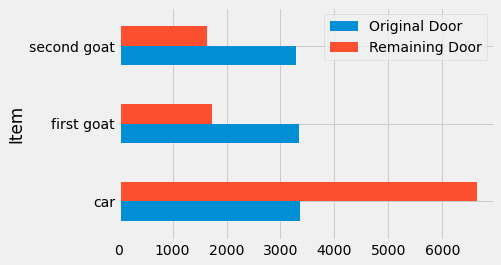

In [20]:
combined.plot.barh('Item')

Notice how the three blue bars are almost equal – the original choice is equally likely to be any of the three available items. But the red bar corresponding to Car is twice as long as the blue.

The simulation confirms that the contestant is twice as likely to win if she switches.

## Probability - At Least One Success##

Data scientists often work with random samples from populations. A question that sometimes arises is about the likelihood that a particular individual in the population is selected to be in the sample. To work out the chance, that individual is called a “success,” and the problem is to find the chance that the sample contains a success.

In [19]:
tosses = np.arange(1, 51, 1)
results = pd.DataFrame({
    'Tosses': tosses,
    'Chance of at least one head': 1 - (1/2)**tosses}
)
results

,Tosses,Chance of at least one head
0,1,0.500000
1,2,0.750000
2,3,0.875000
3,4,0.937500
4,5,0.968750
5,6,0.984375
6,7,0.992188
7,8,0.996094
8,9,0.998047
9,10,0.999023


<AxesSubplot:xlabel='Tosses', ylabel='Chance of at least one head'>

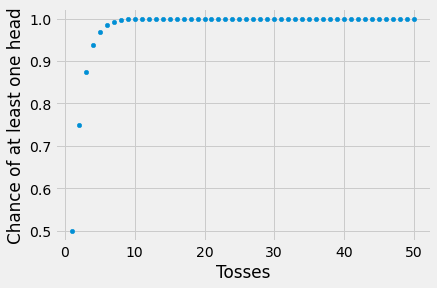

In [20]:
results.plot.scatter('Tosses','Chance of at least one head')

In [21]:
rolls = np.arange(1, 51, 1)
results = pd.DataFrame({
    'Rolls': rolls,
    'Chance of at least one 6': 1 - (5/6)**rolls}
)
results

,Rolls,Chance of at least one 6
0,1,0.166667
1,2,0.305556
2,3,0.421296
3,4,0.517747
4,5,0.598122
5,6,0.665102
6,7,0.720918
7,8,0.767432
8,9,0.806193
9,10,0.838494


<AxesSubplot:xlabel='Rolls', ylabel='Chance of at least one 6'>

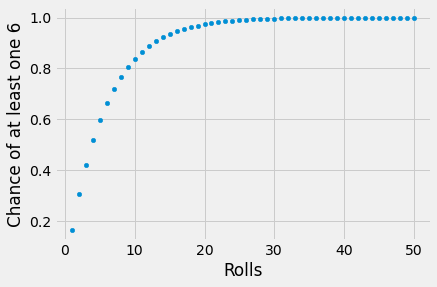

In [23]:
results.plot.scatter('Rolls', 'Chance of at least one 6')

Calculations like these can be used to find the chance that a particular individual is selected in a random sample. The exact calculation will depend on the sampling scheme. But what we have observed above can usually be generalized: increasing the size of the random sample increases the chance that an individual is selected.